[Data Set](https://data.gov.in/catalog/livestock-census-mizoram) : Livestock Census In Mizoram

In [5]:

from google.colab import files
 
 
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd

In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [8]:
df

,State,DISTRICT,BUFFALO,PIG,POULTRY - Backyard,POULTRY - Commercial,CATTLE,MITHUN,GOAT
0,Uttar Pradesh,Lucknow,342,23242,678868,213,2632,350,203
1,Uttar Pradesh,Banaras,87,25252,65985,4,1470,55,445
2,Uttar Pradesh,Rampur,232,4985,464563,2312,367,31,235
3,Uttar Pradesh,Bareilly,11,55425,465756,234,2813,32,1309
4,Uttar Pradesh,Noida,23,35390,169502,234,6663,29,1603
5,Uttar Pradesh,Gaziabad,2,25252,598905,14949,9549,1,3212
6,Uttar Pradesh,Kanpur,493,23598,176103,432,5708,2225,295
7,Uttar Pradesh,Gorakhpur,242,16794,153970,1338,2838,222,502
8,Uttar Pradesh,Muradabad,252,53456,230737,34,5296,13,1
9,Uttar Pradesh,Sambhal,126,21222,207120,4,5785,1,2608


In [9]:
df = df.fillna(0)

In [10]:
df

,State,DISTRICT,BUFFALO,PIG,POULTRY - Backyard,POULTRY - Commercial,CATTLE,MITHUN,GOAT
0,Uttar Pradesh,Lucknow,342,23242,678868,213,2632,350,203
1,Uttar Pradesh,Banaras,87,25252,65985,4,1470,55,445
2,Uttar Pradesh,Rampur,232,4985,464563,2312,367,31,235
3,Uttar Pradesh,Bareilly,11,55425,465756,234,2813,32,1309
4,Uttar Pradesh,Noida,23,35390,169502,234,6663,29,1603
5,Uttar Pradesh,Gaziabad,2,25252,598905,14949,9549,1,3212
6,Uttar Pradesh,Kanpur,493,23598,176103,432,5708,2225,295
7,Uttar Pradesh,Gorakhpur,242,16794,153970,1338,2838,222,502
8,Uttar Pradesh,Muradabad,252,53456,230737,34,5296,13,1
9,Uttar Pradesh,Sambhal,126,21222,207120,4,5785,1,2608


In [11]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BUFFALO                    367.833333
PIG                      50377.833333
POULTRY - Backyard      544775.833333
POULTRY - Commercial      3292.500000
CATTLE                    7616.833333
MITHUN                     671.833333
GOAT                      2025.166667
dtype: float64

In [12]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BUFFALO                    237.0
PIG                      24425.0
POULTRY - Backyard      218928.5
POULTRY - Commercial       234.0
CATTLE                    4067.0
MITHUN                      43.5
GOAT                       905.5
dtype: float64

In [13]:
#Mode
from collections import Counter

for col in df:
  print(col, end="\t")
  c = Counter(df[col])
  print(c.most_common(1)[0][0])

State	Uttar Pradesh
DISTRICT	Lucknow
BUFFALO	342
PIG	25252
POULTRY - Backyard	678868
POULTRY - Commercial	4
CATTLE	2632
MITHUN	1
GOAT	203


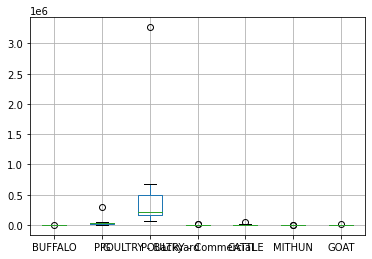

In [14]:
df.boxplot(column=['BUFFALO', 'PIG', 'POULTRY - Backyard', 'POULTRY - Commercial', 'CATTLE', 'MITHUN', 'GOAT'])

In [15]:
import numpy as np

cols = ['BUFFALO', 'PIG', 'POULTRY - Backyard', 'POULTRY - Commercial', 'CATTLE', 'MITHUN', 'GOAT']
for col in cols:
  print("Column ", col)
  data = df[col]
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  print('Q1 Q3 IQR')
  print(Q1,Q3,IQR)
  LQR = Q1-(1.5*IQR)
  UQR = Q3+(1.5*IQR)
  print("Outliers are:")
  for i in data:
    if i < LQR or i > UQR:
      print(i)  

Column  BUFFALO
Q1 Q3 IQR
55.0 369.5 314.5
Outliers are:
2207
Column  PIG
Q1 Q3 IQR
19436.5 44423.0 24986.5
Outliers are:
302267
Column  POULTRY - Backyard
Q1 Q3 IQR
161736.0 532330.5 370594.5
Outliers are:
3268655
Column  POULTRY - Commercial
Q1 Q3 IQR
19.0 1825.0 1806.0
Outliers are:
14949
19755
Column  CATTLE
Q1 Q3 IQR
2606.0 6224.0 3618.0
Outliers are:
45701
Column  MITHUN
Q1 Q3 IQR
21.0 711.0 690.0
Outliers are:
2225
4031
Column  GOAT
Q1 Q3 IQR
265.0 2173.0 1908.0
Outliers are:
12151
